# Network with one extra Hidden Layer
In this File, an Extra Hidden layer is added with 100 Nodes, as can be see in the code below

We run the Training algorith for 27000 Iterations with a Learning rate of 0.001 to get the best training accuracy of 99.3% and an accuracy of 93% on the Test Set.

In [10]:
import matplotlib
matplotlib.use('Agg')
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [11]:
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)
def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass
    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY
trainX,trainY,testX,testY = import_data()

loading training data
loading test data


In [12]:
numEntries = trainX.shape[0]
numFeatures = trainX.shape[1]
numHidden = 100
numLabels = trainY.shape[1]
numEpochs = 27000
learningRate = tf.train.exponential_decay(learning_rate=0.001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [13]:
X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [14]:
weights = tf.Variable(tf.random_normal([numHidden,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))
Hiddenweights = tf.Variable(tf.random_normal([numFeatures,numHidden],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numFeatures+1)),
                                       name="Hiddenweights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [15]:
init_OP = tf.initialize_all_variables()
hid_apply_weights_OP = tf.matmul(X, Hiddenweights, name="hid_apply_weights")
hid_activation_OP = tf.nn.sigmoid(hid_apply_weights_OP, name="hid_activation")
apply_weights_OP = tf.matmul(hid_activation_OP, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [16]:
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [17]:
epoch_values=[]
accuracy_values=[]
cost_values=[]
plt.ion()
fig = plt.figure()
#ax1 = plt.subplot("211")
#ax1.set_title("TRAINING ACCURACY", fontsize=18)
#ax2 = plt.subplot("212")
#ax2.set_title("TRAINING COST", fontsize=18)
#plt.tight_layout()

0.451207
0.535152
0.60021
0.669465
0.729276
0.768101
0.80063
0.832109
0.859391
0.873033
0.885624
0.883526
0.896118
0.900315
0.904512
0.911857
0.913956
0.916055
0.92235
0.924449
0.926548
0.928646
0.931794
0.933893
0.93809
0.941238
0.943337
0.947534
0.951731
0.954879
0.955929
0.958027
0.958027
0.958027
0.960126
0.960126
0.961175
0.961175
0.961175
0.961175
0.961175
0.962225
0.963274
0.964323
0.964323
0.964323
0.965373
0.965373
0.965373
0.965373
0.965373
0.965373
0.96852
0.96852
0.96957
0.96957
0.970619
0.972718
0.972718
0.972718
0.973767
0.974816
0.975866
0.975866
0.975866
0.975866
0.976915
0.976915
0.976915
0.977964
0.977964
0.981112
0.981112
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.982162
0.983211
0.983211
0.983211
0.983211
0.983211
0.983211
0.983211
0.983211
0.98426
0.98426
0.98426
0.98426
0.98426
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.98531
0.

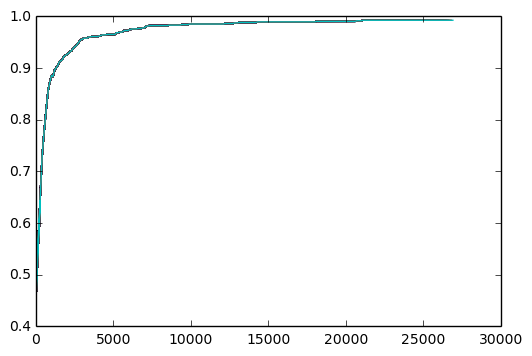

In [20]:
sess = tf.Session()
sess.run(init_OP)
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
activation_summary_OP = tf.histogram_summary("output", activation_OP)
accuracy_summary_OP = tf.scalar_summary("accuracy", accuracy_OP)
cost_summary_OP = tf.scalar_summary("cost", cost_OP)
weightSummary = tf.histogram_summary("weights", weights.eval(session=sess))
biasSummary = tf.histogram_summary("biases", bias.eval(session=sess))
all_summary_OPS = tf.merge_all_summaries()
writer = tf.train.SummaryWriter("summary_logs", sess.graph)
# Initialize reporting variables
cost = 0
diff = 1
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        if i % 100 == 0:
            epoch_values.append(i)
            #summary_results = sess.run(all_summary_OPS, feed_dict = {X:trainX, yGold: trainY})
            train_accuracy = sess.run(accuracy_OP, feed_dict={X: trainX, yGold: trainY})
            newCost = sess.run(cost_OP, feed_dict={X: trainX, yGold: trainY})
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            diff = abs(newCost - cost)
            cost = newCost    
            #print("step %d, cost %g"%(i, newCost))
            #print("step %d, change in cost %g"%(i, diff))
            accuracyLine, = plt.plot(epoch_values, accuracy_values)
            #costLine, = plt.plot(epoch_values, cost_values)
            print(train_accuracy)
            #fig.canvas.draw()
            #time.sleep(1)            

In [21]:
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

final accuracy on test set: 0.933333
